In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [5]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('test.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
passengers = train.copy()

In [10]:
passengers.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
passengers = passengers[passengers.columns[~passengers.columns.isin(['Name','Ticket','Cabin'])]]

In [12]:
passengers['Age'].value_counts().sort_values(ascending=False)

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
14.50     1
0.67      1
24.50     1
20.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [13]:
passengers = passengers[passengers['Age'].notna()]

In [14]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Sex          714 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        714 non-null    int64  
 6   Parch        714 non-null    int64  
 7   Fare         714 non-null    float64
 8   Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 55.8+ KB


In [15]:
passengers.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [16]:
passengers = passengers[passengers['Embarked'].notna()]

In [17]:
passengers['Sex'] = passengers['Sex'].astype('string')

In [18]:
passengers['Embarked'] = passengers['Embarked'].astype('string')

In [19]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    string 
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Fare         712 non-null    float64
 8   Embarked     712 non-null    string 
dtypes: float64(2), int64(5), string(2)
memory usage: 55.6 KB


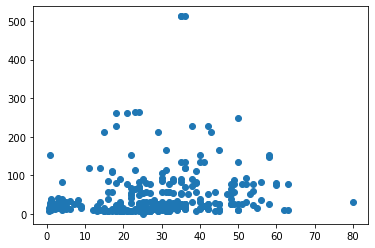

In [20]:
plt.scatter(x=passengers[passengers['Survived']==1]['Age'], y = passengers[passengers['Survived']==1]['Fare'])
plt.title('')
plt.show()

## Looks like the some of the high fare ticket passengers are survived.

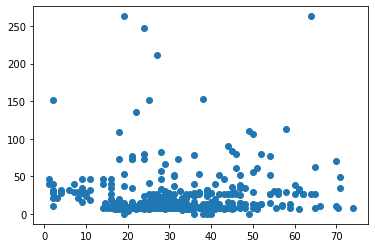

In [21]:
plt.scatter(x=passengers[passengers['Survived']==0]['Age'], y = passengers[passengers['Survived']==0]['Fare'])
plt.show()

### Looks like bottom of the ticket cost

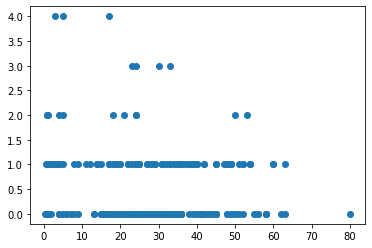

In [22]:
plt.scatter(x=passengers[passengers['Survived']==1]['Age'], y = passengers[passengers['Survived']==1]['SibSp'])
plt.show()

### when the age is getting lower the siblings are more and the high it goes the lower siblings they have

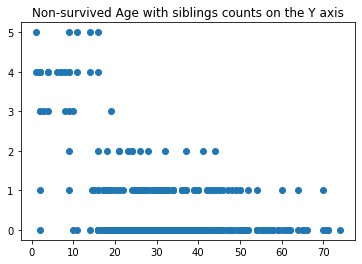

In [23]:
plt.scatter(x=passengers[passengers['Survived']==0]['Age'], y = passengers[passengers['Survived']==0]['SibSp'])
plt.title('Non-survived Age with siblings counts on the Y axis')
plt.show()

#### When it is more siblings with children who are under 18 there are more number of non-survivel. Children who has very less siblings are more like to get saved.

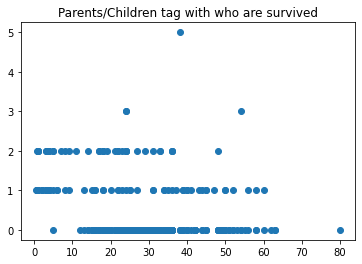

In [24]:
plt.scatter(x=passengers[passengers['Survived']==1]['Age'], y = passengers[passengers['Survived']==1]['Parch'])
plt.title('Parents/Children tag with who are survived')
plt.show()

### Could not make any reasonable infrence from the above graph

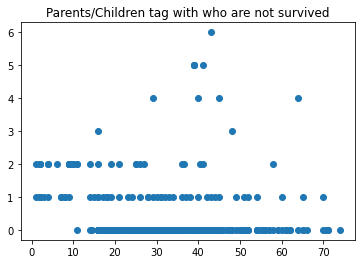

In [25]:
plt.scatter(x=passengers[passengers['Survived']==0]['Age'], y = passengers[passengers['Survived']==0]['Parch'])
plt.title('Parents/Children tag with who are not survived')
plt.show()

### When the family is large (more than 3 parents or child) they are more chance to drown in the water. 
### BTP (behind the picture): when there are more people in the family, after downing they are going to find their faimily members (parent/siblings) in the water to save each other with emotion and carrying love but they are going away from saving their own life of each one of them.

In [26]:
passengers[passengers['Survived']==1]['Sex'].value_counts()

female    195
male       93
Name: Sex, dtype: Int64

In [27]:
F_count = passengers[passengers['Survived']==1]['Sex'].value_counts()[0]
M_count = passengers[passengers['Survived']==1]['Sex'].value_counts()[1]

In [28]:
int("{:.0f}".format(F_count/(F_count + M_count) * 100))

68

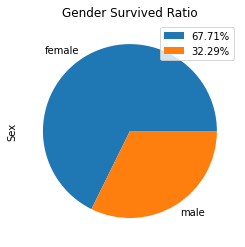

In [29]:
passengers[passengers['Survived']==1]['Sex'].value_counts().plot.pie()
plt.title('Gender Survived Ratio')
plt.legend(["{:.2f}%".format(F_count/(F_count + M_count)*100),"{:.2f}%".format(M_count/(M_count + F_count)*100)])
plt.show()

In [30]:
passengers[passengers['Survived']==0]['Sex'].value_counts()

male      360
female     64
Name: Sex, dtype: Int64

In [31]:
Mnot_sur = passengers[passengers['Survived']==0]['Sex'].value_counts()[0]
Fnot_sur = passengers[passengers['Survived']==0]['Sex'].value_counts()[1]

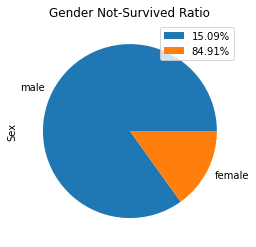

<Figure size 136800x129600 with 0 Axes>

In [32]:
passengers[passengers['Survived']==0]['Sex'].value_counts().plot.pie()
plt.title('Gender Not-Survived Ratio')
plt.legend(["{:.2f}%".format(Fnot_sur/(Fnot_sur + Mnot_sur)*100),"{:.2f}%".format(Mnot_sur/(Mnot_sur + Fnot_sur)*100)])
plt.figure(figsize=(1900,1800))
plt.show()

### From the above ratio, we get to konw that men are not survived more when compared to women.
### BTP (Behind the Picture): Men would be aiming to save women of their family and friends and others in order to do that unwillingly they are losing their life.

In [33]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    string 
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Fare         712 non-null    float64
 8   Embarked     712 non-null    string 
dtypes: float64(2), int64(5), string(2)
memory usage: 55.6 KB


In [34]:
passengers_df = passengers.copy()

In [35]:
passengers_df['Sex'] = passengers_df.Sex.astype('object')

In [36]:
passengers_df['Embarked'] = passengers_df['Embarked'].astype('object')

In [37]:
dum = pd.get_dummies(passengers_df[['Sex','Embarked']])

In [38]:
dum

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
885,1,0,0,1,0
886,0,1,0,0,1
887,1,0,0,0,1
889,0,1,1,0,0


In [39]:
X = pd.concat([passengers_df, dum], axis=1)

In [40]:
X = X.drop(['Embarked','Sex','Fare'], axis=1)

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Sex_female   712 non-null    uint8  
 7   Sex_male     712 non-null    uint8  
 8   Embarked_C   712 non-null    uint8  
 9   Embarked_Q   712 non-null    uint8  
 10  Embarked_S   712 non-null    uint8  
dtypes: float64(1), int64(5), uint8(5)
memory usage: 42.4 KB


In [42]:
y = X['Survived']
X = X.drop(['Survived'], axis=1)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, test_size=.3, random_state=42)

## Lets try Decision Tree first and check the numbers

In [45]:
## Lets try decision trees now

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
from sklearn.metrics import classification_report

In [48]:
dt_class = DecisionTreeClassifier(random_state=42, max_depth=4)

In [49]:
%%time
dt_class.fit(X_train, y_train)

Wall time: 6.02 ms


DecisionTreeClassifier(max_depth=4, random_state=42)

In [50]:
y_pred_test = dt_class.predict(X_test)
y_pred_train = dt_class.predict(X_train)

In [51]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 58 to 131
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  498 non-null    int64  
 1   Pclass       498 non-null    int64  
 2   Age          498 non-null    float64
 3   SibSp        498 non-null    int64  
 4   Parch        498 non-null    int64  
 5   Sex_female   498 non-null    uint8  
 6   Sex_male     498 non-null    uint8  
 7   Embarked_C   498 non-null    uint8  
 8   Embarked_Q   498 non-null    uint8  
 9   Embarked_S   498 non-null    uint8  
dtypes: float64(1), int64(4), uint8(5)
memory usage: 25.8 KB


In [75]:
X_train.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [52]:
from sklearn.metrics import plot_roc_curve

### Ploting the ROC curve

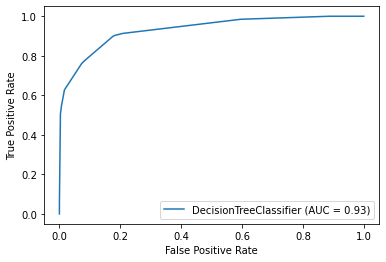

In [53]:
plot_roc_curve(dt_class, X_train, y_train , drop_intermediate=False)
plt.show()

## Preparing test data for predict

In [54]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [55]:
test[~test.isin(['Pclass'])]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<AxesSubplot:>

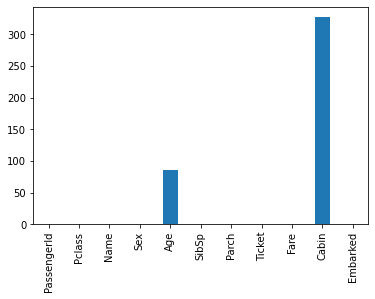

In [56]:
test.isna().sum().plot(kind='bar')

In [57]:
test[['PassengerId', 'Sex', 'Age', 'Pclass','SibSp','Parch','Embarked']]

,PassengerId,Sex,Age,Pclass,SibSp,Parch,Embarked
0,892,male,34.5,3,0,0,Q
1,893,female,47.0,3,1,0,S
2,894,male,62.0,2,0,0,Q
3,895,male,27.0,3,0,0,S
4,896,female,22.0,3,1,1,S
...,...,...,...,...,...,...,...
413,1305,male,NaN,3,0,0,S
414,1306,female,39.0,1,0,0,C
415,1307,male,38.5,3,0,0,S
416,1308,male,NaN,3,0,0,S


In [58]:
test_df = test[['PassengerId', 'Sex', 'Age', 'Pclass','SibSp','Parch','Embarked']]

In [59]:
test_ready = pd.concat([pd.get_dummies(test_df[['Sex', 'Embarked']]), test_df], axis=1)

In [60]:
test_ready.isna().sum()

Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
PassengerId     0
Sex             0
Age            86
Pclass          0
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [61]:
test_ready['Age'].mean()

30.272590361445783

In [62]:
test_ready['Age'] = test_ready['Age'].fillna('30')

In [63]:
test_ready.isna().sum()

Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
PassengerId    0
Sex            0
Age            0
Pclass         0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [64]:
test_ready = test_ready.loc[:, ~test_ready.columns.isin(['Embarked', 'Sex'])]

In [65]:
test_ready.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,PassengerId,Age,Pclass,SibSp,Parch
0,0,1,0,1,0,892,34.5,3,0,0
1,1,0,0,0,1,893,47,3,1,0
2,0,1,0,1,0,894,62,2,0,0
3,0,1,0,0,1,895,27,3,0,0
4,1,0,0,0,1,896,22,3,1,1


In [66]:
test_ready.describe()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,PassengerId,Pclass,SibSp,Parch
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,0.636364,0.244019,0.110048,0.645933,1100.500000,2.265550,0.447368,0.392344
std,0.481622,0.481622,0.430019,0.313324,0.478803,120.810458,0.841838,0.896760,0.981429
min,0.000000,0.000000,0.000000,0.000000,0.000000,892.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,996.250000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,1100.500000,3.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,1204.750000,3.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1309.000000,3.000000,8.000000,9.000000


In [77]:
test_ready = test_ready.loc[:,X_train.columns]

In [78]:
y_predict_test = dt_class.predict(test_ready)

In [79]:
len(y_predict_test)

418

In [80]:
result = pd.DataFrame(data={"PassengerId":test_ready['PassengerId'] , "Survival" : y_predict_test.astype('object')})

In [102]:
result['Survival'].value_counts()

0    332
1     86
Name: Survival, dtype: int64

<AxesSubplot:ylabel='Survival'>

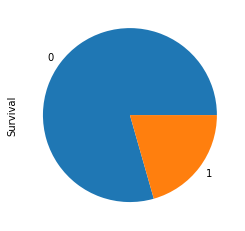

In [82]:
result['Survival'].value_counts().plot.pie()

## Random Forest classifer

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
RFC = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=4, random_state=42, oob_score=True)

In [86]:
%%time
RFC.fit(X, y)

Wall time: 24.9 ms


RandomForestClassifier(max_depth=4, max_features=4, n_estimators=10,
                       oob_score=True, random_state=42)

In [87]:
RFC.oob_score_

0.7949438202247191

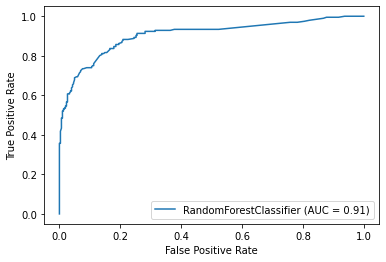

In [88]:
plot_roc_curve(RFC, X_train, y_train)
plt.show()

In [89]:
RFC.feature_importances_

array([0.03955074, 0.2346764 , 0.09694041, 0.01680359, 0.02727212,
       0.34170678, 0.22458042, 0.01151169, 0.00229962, 0.00465823])

In [90]:
score_box = pd.DataFrame({'Features': X_train.columns,
             'value': RFC.feature_importances_})

In [91]:
print(score_box.sort_values(by=['value'], ascending=False))

      Features     value
5   Sex_female  0.341707
1       Pclass  0.234676
6     Sex_male  0.224580
2          Age  0.096940
0  PassengerId  0.039551
4        Parch  0.027272
3        SibSp  0.016804
7   Embarked_C  0.011512
9   Embarked_S  0.004658
8   Embarked_Q  0.002300


In [92]:
test_ready = test_ready[X_test.columns]

In [93]:
test_ready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Pclass       418 non-null    int64 
 2   Age          418 non-null    object
 3   SibSp        418 non-null    int64 
 4   Parch        418 non-null    int64 
 5   Sex_female   418 non-null    uint8 
 6   Sex_male     418 non-null    uint8 
 7   Embarked_C   418 non-null    uint8 
 8   Embarked_Q   418 non-null    uint8 
 9   Embarked_S   418 non-null    uint8 
dtypes: int64(4), object(1), uint8(5)
memory usage: 18.5+ KB


In [94]:
test_result = RFC.predict(test_ready)

In [95]:
test_result

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [96]:
test_result_df = pd.DataFrame(data={'PassengerID': test_ready['PassengerId'], 'Survived' : test_result})

In [101]:
test_result_df['Survived'].value_counts()

0    305
1    113
Name: Survived, dtype: int64

<AxesSubplot:ylabel='Survived'>

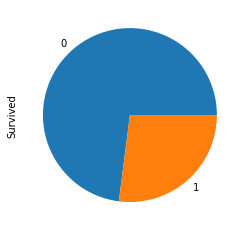

In [103]:
test_result_df['Survived'].value_counts().plot.pie()

In [104]:
test_result_df.to_csv('./submission.csv', index=False)